# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [1]:
# import pandas as pd

# df = # your code here
# df.describe()

#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [2]:
# def num_nans(df):
#     return # your code here

# print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [3]:
# def drop_na(df):
#     return # your code here

# df = drop_na(df)
# df.columns

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [4]:
# def to_numerical(df):
#     return # your code here

# df['Sex'] = to_numerical(df)
# df.head()

#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
# def extract_names(df):
#     return # your code here

# df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
# df.head()

#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [6]:
# def replace_with_mean(df):
#     return # your code here

# df['Age'] = replace_with_mean(df)
# df.head()

`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

In [7]:
# your code here

-> your answer here

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

In [8]:
# your code here

-> your answer here

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

In [9]:
# your code here

-> your answer here

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

In [10]:
# your code here

-> your answer here

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

In [11]:
# your code here

-> your answer here

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [12]:
# # your code here
# df.head()

#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [13]:
# df = # < your code here >

#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [14]:
# def N_most_similar_pairs(df, N):
#     return # < your code here >

# print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


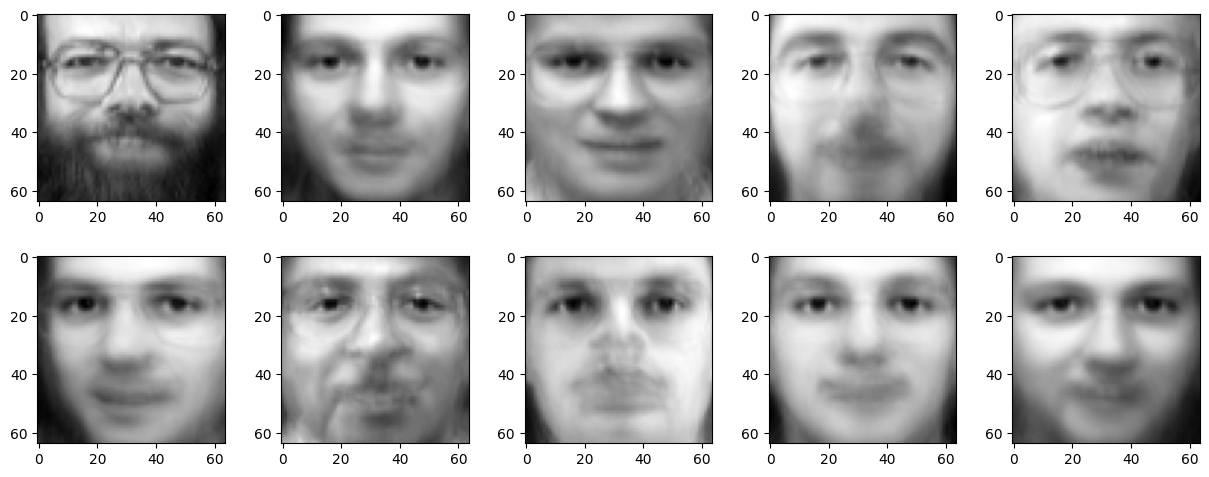

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

# your code here
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(faces_data)

# Plot the centroid of each cluster
fig, axes = plt.subplots(2,5,figsize=(15, 6),gridspec_kw=dict(hspace=0.1,wspace=0.3))

for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(64, 64), cmap='gray')
plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [16]:
from sklearn.metrics import silhouette_score 

kmeans_silhouette = silhouette_score(faces_data,kmeans.labels_)
target_silhouette = silhouette_score(faces_data,faces.target)

print(f"Silhouette Score - K-means: {kmeans_silhouette:.2f}")
print(f"Silhouette Score - label: {target_silhouette:.2f}")

Silhouette Score - K-means: 0.09
Silhouette Score - label: 0.11


The k-means and the silhouette score obtained by provided label are close to each other and close to 0. Which tell us the clustes are not well separated, or both method are not able to configure well separated cluster base on information provided.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

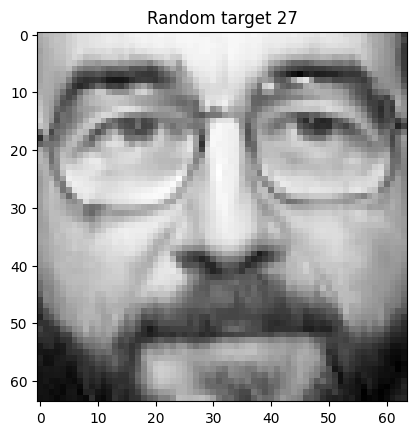

In [17]:
import numpy as np

random_idx = np.random.randint(faces.images.shape[0])

# Plot the random image
plt.title(f"Random target {faces.target[random_idx]}")
plt.imshow(faces.images[random_idx], cmap='gray')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


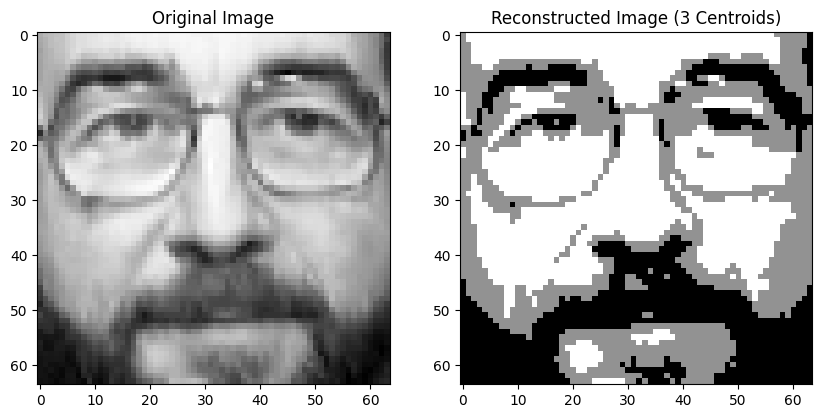

In [18]:
original_image = faces.images[random_idx]

original_image_2d = original_image.reshape((-1, 1))

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(original_image_2d)

reconstruct_label = kmeans.labels_
reconstruct_image = kmeans.cluster_centers_[reconstruct_label]

reconstruct_image_2d = reconstruct_image.reshape(original_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(reconstruct_image_2d, cmap='gray')
ax[1].set_title('Reconstructed Image (3 Centroids)')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


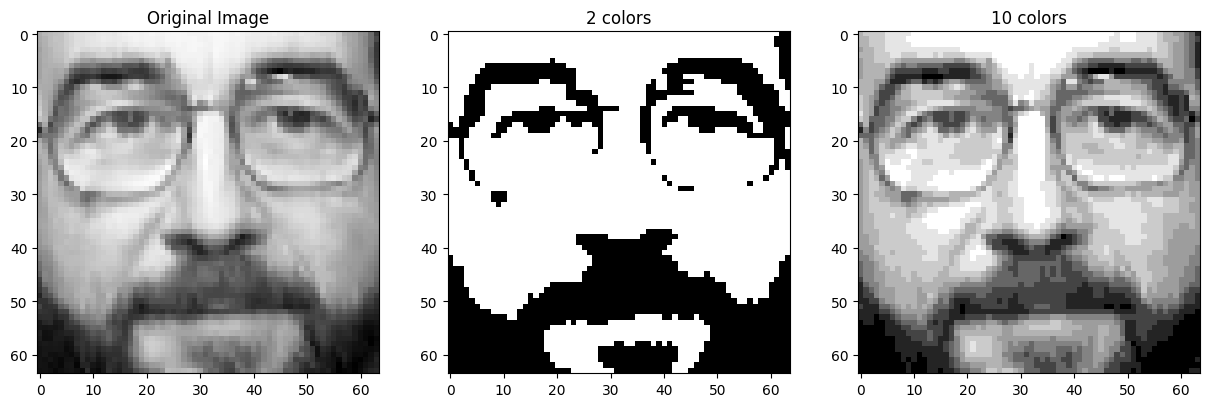

In [20]:
def n_colors(image, n, ax):
    image_2d = image.reshape((-1, 1))
    
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(image_2d)
    clustered_labels = kmeans.labels_
    
    # Replace each pixel value with its corresponding centroid
    reconstruct_image = kmeans.cluster_centers_[clustered_labels].reshape(image.shape)
    
    if ax:
        ax.imshow(reconstruct_image, cmap='gray')
        ax.set_title(f'{n} colors')
    else:
        plt.imshow(reconstruct_image, cmap='gray')
        plt.title(f'{n} colors')
        plt.show()


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')

n_colors(original_image, n=2, ax=ax[1])
n_colors(original_image, n=10, ax=ax[2])

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.